# 🍷 Wine Quality ML Dashboard - Análisis de Clustering

---

**Autor:** Daniel Mardones  
**Proyecto:** Visualización y Machine Learning aplicado a la calidad del vino



## Descripción

Este notebook presenta un análisis completo de clustering sobre el dataset de calidad de vino. Se exploran técnicas de Machine Learning y se muestran las capacidades de las principales librerías de visualización en Python: Matplotlib, Seaborn, Plotly y Altair.

## Objetivos

- Realizar un análisis exploratorio detallado (EDA) del dataset.
- Aplicar modelos de clustering y evaluar su desempeño.
- Visualizar los datos y resultados con diferentes librerías gráficas.
- Extraer insights y recomendaciones para el negocio vitivinícola.

## Estructura

1. Introducción y contexto del problema.
2. EDA: exploración y visualización de datos.
3. Modelado de clustering.
4. Visualización de resultados.
5. Interpretación, insights y recomendaciones.

---

¡Comencemos!

In [7]:
# Importar librerías
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [8]:
# Cargar datos
df = pd.read_csv('../data/WineQT.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [9]:
# Preprocesamiento
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop('quality', axis=1))

In [10]:
# Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df['cluster'] = clusters

In [11]:
# Exportar resultados para Streamlit Cloud
import json
resultados = {
    'modelo': 'KMeans',
    'clusters': clusters.tolist()
}
with open('../utils/clustering_results.json', 'w') as f:
    json.dump(resultados, f, indent=2)

# Análisis Exploratorio de Datos (EDA)

En esta sección se exploran las características principales del dataset, se identifican valores nulos, se analizan distribuciones y correlaciones, y se generan visualizaciones con distintas librerías para destacar sus fortalezas.

## Mejorando las Visualizaciones

Para enriquecer el análisis, se pueden agregar gráficos circulares (pie charts), gráficos de barras comparativos y visualizaciones avanzadas que ayuden a entender la composición y distribución de las variables clave del dataset.

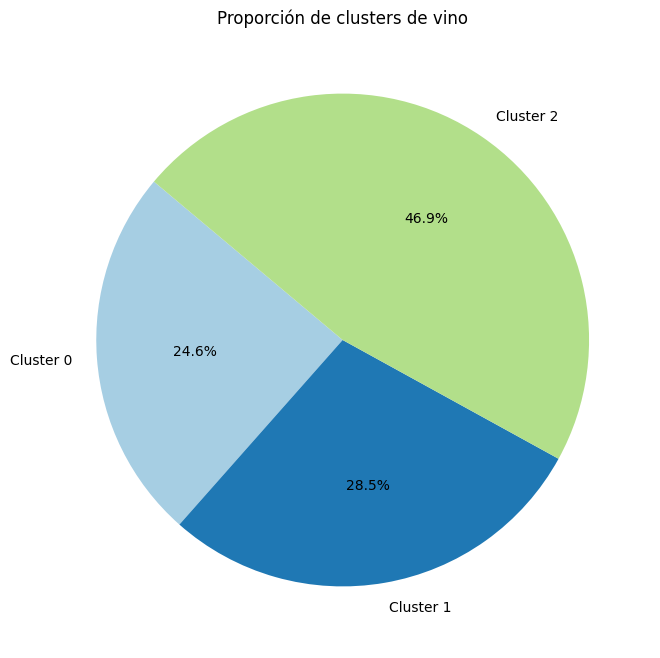

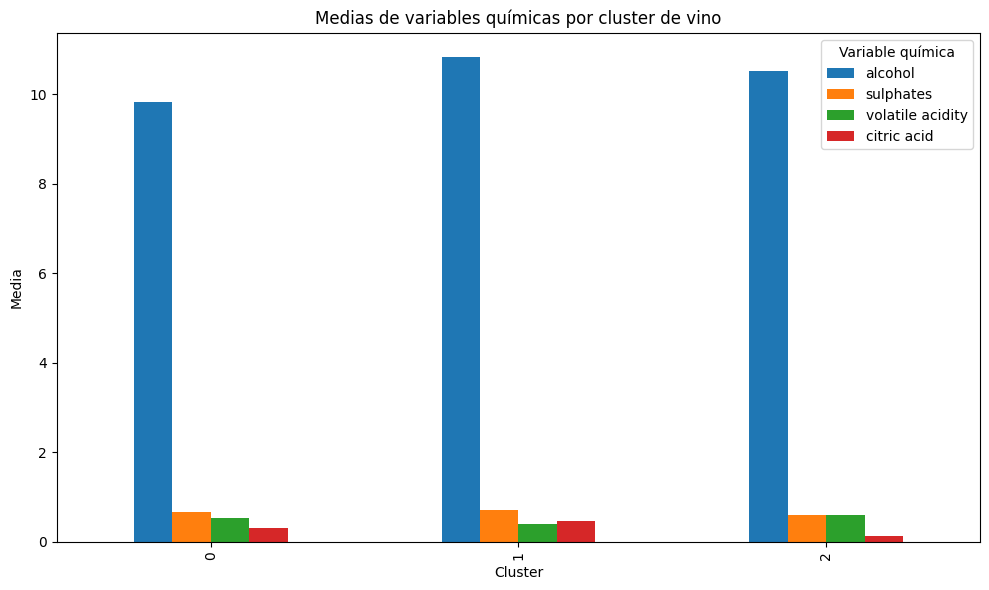

In [12]:
import matplotlib.pyplot as plt
# Gráfico circular de proporción de clusters
cluster_counts = df['cluster'].value_counts().sort_index()
plt.figure(figsize=(8,8))
plt.pie(cluster_counts, labels=[f'Cluster {i}' for i in cluster_counts.index], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Proporción de clusters de vino')
plt.show()

# Gráfico de barras comparativo de medias de variables químicas por cluster
variables_quimicas = ['alcohol', 'sulphates', 'volatile acidity', 'citric acid']
medias = df.groupby('cluster')[variables_quimicas].mean()
medias.plot(kind='bar', figsize=(10,6))
plt.title('Medias de variables químicas por cluster de vino')
plt.xlabel('Cluster')
plt.ylabel('Media')
plt.legend(title='Variable química')
plt.tight_layout()
plt.show()

## Visualización de Clusters: Gráficos de Dispersión

Los gráficos de dispersión permiten observar cómo se agrupan los datos en los diferentes clusters y entender la separación entre ellos. Son útiles para validar la calidad del agrupamiento y detectar patrones o anomalías.

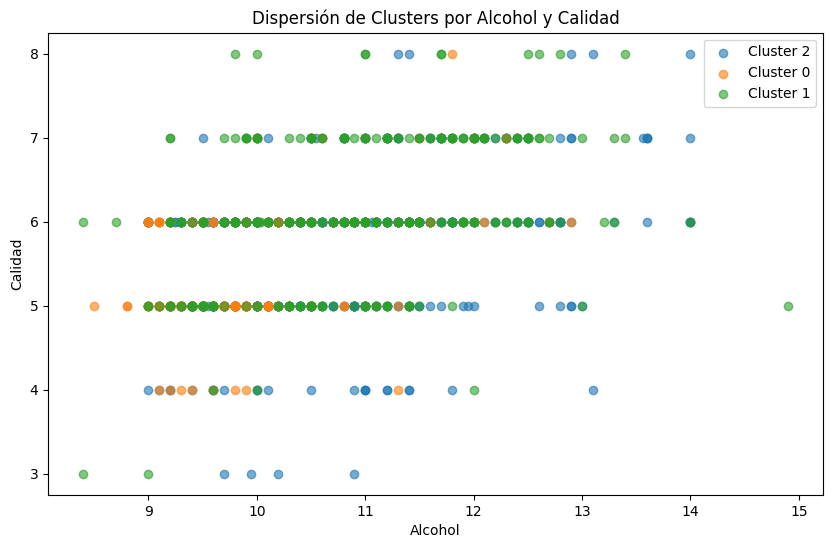

In [13]:
# Gráfico de dispersión de clusters con Matplotlib
plt.figure(figsize=(10,6))
for cluster in df['cluster'].unique():
    subset = df[df['cluster'] == cluster]
    plt.scatter(subset['alcohol'], subset['quality'], label=f'Cluster {cluster}', alpha=0.6)
plt.xlabel('Alcohol')
plt.ylabel('Calidad')
plt.title('Dispersión de Clusters por Alcohol y Calidad')
plt.legend()
plt.show()

# Gráfico de dispersión interactivo de clusters con Plotly
import plotly.express as px
fig = px.scatter(df, x='alcohol', y='quality', color='cluster', title='Dispersión de Clusters (Alcohol vs Calidad)', labels={'cluster':'Cluster'})
fig.show()